In [63]:
import networkx as nx
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import ControlledGate
from qiskit.circuit.library.standard_gates import *
import random
import matplotlib.pyplot as plt

In [49]:
random.seed(275)
np.random.seed(275)

In [50]:
# Define TSP Instance
G = nx.erdos_renyi_graph(4,0.86)
for e in G.edges():
    G.add_edge(e[0], e[1], weight=np.round(np.abs(np.random.normal(0,2)),3))

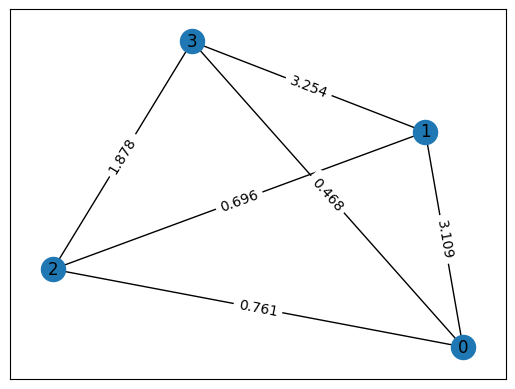

In [51]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

## A. TSP Problem Encoding
* Each city is

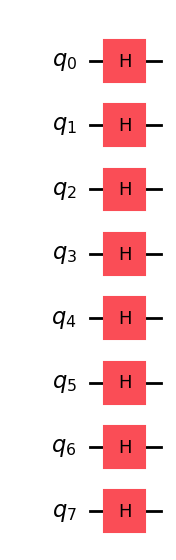

In [66]:
# Define your parameters
N = 4 # Example value for N
m = int(np.ceil(np.log(N))) # Number of qubits per-city

# Calculate the total number of qubits needed
cycle_register_size = m * N

# Create a quantum circuit with mN qubits
cycle_register = QuantumCircuit(cycle_register_size)

# Apply Hadamard gates to each qubit to put them in superposition
for qubit in range(cycle_register_size):
    cycle_register.h(qubit)
    
cycle_register.draw('mpl')

In [55]:
adj_matrix = nx.adjacency_matrix(G) # Adjacency Matrix for TSP Instance
adj_lists = [[c for c in G[i]] for i in G.nodes()] # Adjacency List for TSP Instance

  (0, 1)	3.109
  (0, 2)	0.761
  (0, 3)	0.468
  (1, 0)	3.109
  (1, 2)	0.696
  (1, 3)	3.254
  (2, 0)	0.761
  (2, 1)	0.696
  (2, 3)	1.878
  (3, 0)	0.468
  (3, 1)	3.254
  (3, 2)	1.878


In [70]:
t = N * m
qc = QuantumCircuit(N * m + t + 1)
for i in range(N * m, N * m + t):
    qc.h(i)
qc.draw()

q_0: ─────
           
 q_1: ─────
           
 q_2: ─────
           
 q_3: ─────
           
 q_4: ─────
           
 q_5: ─────
           
 q_6: ─────
           
 q_7: ─────
      ┌───┐
 q_8: ┤ H ├
      ├───┤
 q_9: ┤ H ├
      ├───┤
q_10: ┤ H ├
      ├───┤
q_11: ┤ H ├
      ├───┤
q_12: ┤ H ├
      ├───┤
q_13: ┤ H ├
      ├───┤
q_14: ┤ H ├
      ├───┤
q_15: ┤ H ├
      └───┘
q_16: ─────